# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [53]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [54]:
l = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]]
df = pd.DataFrame(l)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12
4,13,14,15


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

The labels for rows and columns are indices of the array

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [55]:
df=pd.DataFrame({'Jan':{'New York':1,'Chicago':4,'Washington':7,'Florida':10,'Orlando':13},'Feb':{'New York':2,'Chicago':5,'Washington':8,'Florida':11,'Orlando':14},'Mar':{'New York':3,'Chicago':6,'Washington':9,'Florida':12,'Orlando':15}})
df

,Jan,Feb,Mar
New York,1,2,3
Chicago,4,5,6
Washington,7,8,9
Florida,10,11,12
Orlando,13,14,15


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [56]:
df_homes = pd.read_csv("/content/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df_homes.head()

FileNotFoundError: ignored

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [ ]:
df_homes.to_csv(r"C:\Users\HP\Downloads\zillow_home_data.csv")

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [ ]:
df_homes_2 = pd.read_csv(r"C:\Users\HP\Downloads\zillow_home_data.csv")
df_homes_2.head()

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [ ]:
df_homes.shape
df_homes_2.shape

No. The indices of df_homes are also being counted as a column in df_homes_2.

In [ ]:
df_homes_2=df_homes_2.drop('Unnamed: 0', axis=1)
df_homes_2

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [ ]:
feb=pd.read_excel('/content/AnalyticsSnapshot.xlsx', sheet_name= 'February 2022')
feb

**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [ ]:
feb['Percentage Increase']=(feb['This Month']-feb['Last Month'])*100/feb['Last Month']
feb

## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [58]:
df_penguins = sb.load_dataset('penguins')
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**12.** Write the code to show the the number of rows and columns in df_penguins

In [59]:
df_penguins.shape

(344, 7)

**13.** How might you show the first few rows of df_penguins?

In [60]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [61]:
uni = df_penguins['species'].unique()
uni

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

**15.** What function can we use to drop the rows that have missing data?

In [62]:
sth=df_penguins.dropna(how='any')
sth

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**16.** By default, will this modify df_penguins or will it return a copy?

It will return a copy

**17.** How can we override the default?

By using inplace=True

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [63]:
df_penguins_full=df_penguins.dropna()
df_penguins_full

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [64]:
df_penguins_full['bill_length_mm'].mean()

43.99279279279279

**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

By plotting a heatmap of correlation between the columns, we conclude that flipper_length_mm is the most strongly correlated column here, since the lighter the color, the stronger the correlation.

<ipython-input-65-d15cf2ae88c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df_penguins_full.corr())


<Axes: >

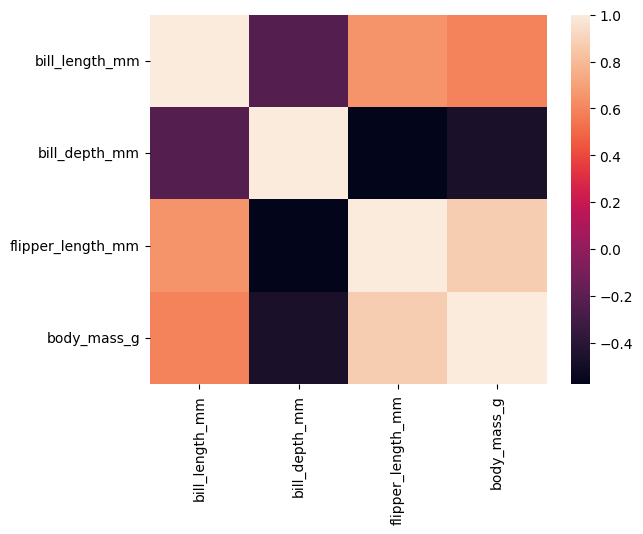

In [65]:
sb.heatmap(df_penguins_full.corr())

**21.** How could you show the median flipper length, grouped by species?

In [66]:
md=df_penguins_full.groupby(by='species').median()
md

<ipython-input-66-d13cbad226f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  md=df_penguins_full.groupby(by='species').median()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.85,18.40,190.0,3700.0
Chinstrap,49.55,18.45,196.0,3700.0
Gentoo,47.40,15.00,216.0,5050.0


**22.** Which species has the longest flippers?

gentoo

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

By observing the following dataframe, we can conclude that Adelie and Chinstrap have the most similar mean weight.

In [67]:
md=df_penguins_full.groupby(by='species').mean()
md

<ipython-input-67-e7cf7e6c9530>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  md=df_penguins_full.groupby(by='species').mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


**24.** How could you sort the rows by bill length?

In [68]:
df_sorted=df_penguins_full.sort_values(by='bill_length_mm')
df_sorted

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female


**25.** How could you run the same sort in descending order?

In [69]:
df_sorted=df_penguins_full.sort_values(ascending=False, by='bill_length_mm')
df_sorted

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


**26.** How could you sort by species first, then by body mass?

In [70]:
df_sorted=df_penguins_full.sort_values(by=['species','body_mass_g'])
df_sorted

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
...,...,...,...,...,...,...,...
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [71]:
df=sb.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**28.** Display the columns that are available.

In [72]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

In [73]:
type(df['carat'])

pandas.core.series.Series

Pandas Series

**30.** Select the 'table' column and show its type

In [74]:
df['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [75]:
subset = df[['price', 'carat']].head(10)
subset

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31
5,336,0.24
6,336,0.24
7,337,0.26
8,337,0.22
9,338,0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [76]:
df['carat'].dtype

dtype('float64')

**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [77]:
row= df.iloc[0]
row

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [78]:
type(row)

pandas.core.series.Series

**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

**36.** Select the row with the highest priced diamond.

In [79]:
max_price=df['price'].max()
row=df.loc[pd.Index([max_price], name='price')]
row

,carat,cut,color,clarity,depth,table,price,x,y,z
price,,,,,,,,,,
18823,1.26,Ideal,G,SI1,61.9,56.0,7711,6.92,6.98,4.3


In [80]:
max_price_index = df['price'].idxmax()
row = df.loc[max_price_index]
row

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table         60.0
price        18823
x              8.5
y             8.47
z             5.16
Name: 27749, dtype: object

**37.** Select the row with the lowest priced diamond.

In [81]:
min_price_index = df['price'].idxmin()
row = df.loc[min_price_index]
row

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [82]:
taxis=sb.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [83]:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'], format='%Y-%m-%d %H:%M:%S')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04 16:11:55
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27 17:53:01
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10 01:23:59
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30 13:27:42


**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [84]:
start=pd.to_datetime('2019-03-23 00:06:00')
end=pd.to_datetime('2019-03-24 00:00:00')
taxis_one_day=taxis[(taxis['pickup_time']>=start)&(taxis['pickup_time']<end)]
taxis_one_day

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,2019-03-23 11:48:50
17,2019-03-23 20:50:49,2019-03-23 21:02:07,1,2.60,10.5,2.00,0.0,16.30,yellow,credit card,Midtown Center,East Harlem South,Manhattan,Manhattan,2019-03-23 20:50:49
117,2019-03-23 09:39:25,2019-03-23 09:56:45,0,3.60,15.5,3.75,0.0,22.55,yellow,credit card,Yorkville East,Penn Station/Madison Sq West,Manhattan,Manhattan,2019-03-23 09:39:25
144,2019-03-23 18:35:01,2019-03-23 18:47:39,1,3.20,12.5,2.00,0.0,17.80,yellow,credit card,UN/Turtle Bay South,East Village,Manhattan,Manhattan,2019-03-23 18:35:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,2019-03-23 20:52:40,2019-03-23 21:10:12,1,3.62,14.5,0.00,0.0,15.80,green,cash,Long Island City/Hunters Point,Steinway,Queens,Queens,2019-03-23 20:52:40
6331,2019-03-23 11:27:00,2019-03-23 12:20:11,1,7.67,28.0,0.00,0.0,28.00,green,cash,Jackson Heights,Maspeth,Queens,Queens,2019-03-23 11:27:00
6338,2019-03-23 18:05:38,2019-03-23 18:25:36,1,2.82,14.0,0.00,0.0,14.80,green,credit card,Claremont/Bathgate,Spuyten Duyvil/Kingsbridge,Bronx,Bronx,2019-03-23 18:05:38
6427,2019-03-23 18:26:09,2019-03-23 18:49:12,1,7.07,20.0,0.00,0.0,20.00,green,cash,Parkchester,East Harlem South,Bronx,Manhattan,2019-03-23 18:26:09


**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [85]:
means = taxis_one_day.groupby(taxis_one_day['pickup_time'].dt.hour).mean()
means

<ipython-input-85-8f1c2f714f06>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = taxis_one_day.groupby(taxis_one_day['pickup_time'].dt.hour).mean()


,passengers,distance,fare,tip,tolls,total
pickup_time,,,,,,
0,1.000000,1.911667,8.583333,1.415000,0.000000,12.965000
1,1.250000,1.325000,7.875000,1.525000,0.000000,12.575000
2,1.727273,1.739091,8.181818,1.641818,0.000000,13.169091
3,1.500000,3.377500,11.750000,2.410000,0.000000,17.335000
4,2.000000,0.950000,5.500000,0.915000,0.000000,10.215000
5,2.000000,1.270000,6.000000,0.980000,0.000000,10.530000
6,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333
7,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333
8,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000


**42.** Create a simple line plot of the value "distance".  

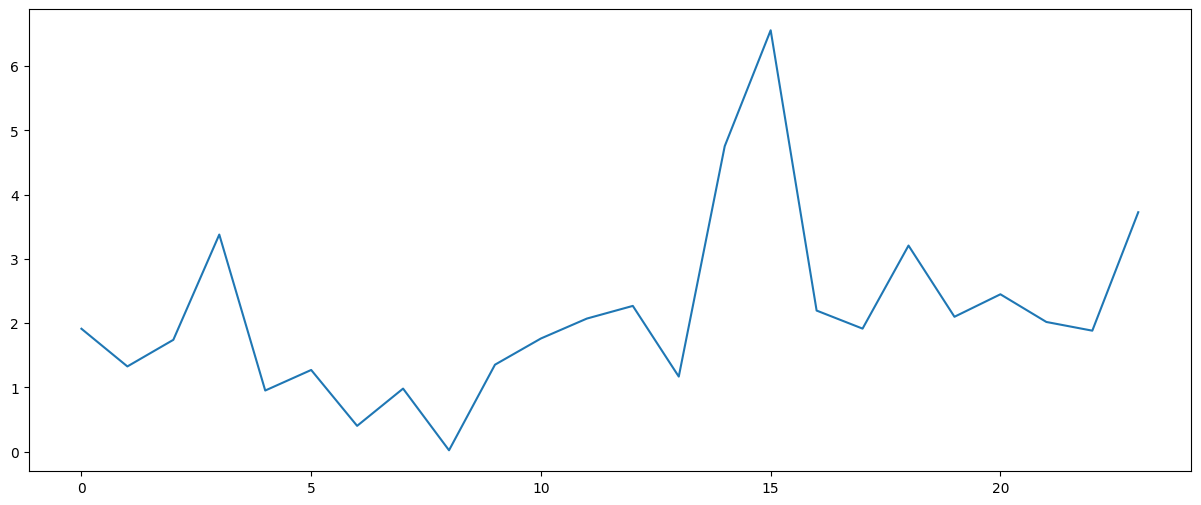

In [86]:
plt.figure(figsize=(15,6))
plt.plot(means['distance'])
plt.show()

**43.** Overall, do riders travel further or less far as the day progresses?

Further

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [87]:
means['tip_in_percent']=means['tip']*100/means['fare']
means

,passengers,distance,fare,tip,tolls,total,tip_in_percent
pickup_time,,,,,,,
0,1.000000,1.911667,8.583333,1.415000,0.000000,12.965000,16.485437
1,1.250000,1.325000,7.875000,1.525000,0.000000,12.575000,19.365079
2,1.727273,1.739091,8.181818,1.641818,0.000000,13.169091,20.066667
3,1.500000,3.377500,11.750000,2.410000,0.000000,17.335000,20.510638
4,2.000000,0.950000,5.500000,0.915000,0.000000,10.215000,16.636364
5,2.000000,1.270000,6.000000,0.980000,0.000000,10.530000,16.333333
6,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333,0.000000
7,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333,22.190476
8,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000,0.000000


**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [88]:
means['time_interval']=range(0,24)
means

,passengers,distance,fare,tip,tolls,total,tip_in_percent,time_interval
pickup_time,,,,,,,,
0,1.000000,1.911667,8.583333,1.415000,0.000000,12.965000,16.485437,0
1,1.250000,1.325000,7.875000,1.525000,0.000000,12.575000,19.365079,1
2,1.727273,1.739091,8.181818,1.641818,0.000000,13.169091,20.066667,2
3,1.500000,3.377500,11.750000,2.410000,0.000000,17.335000,20.510638,3
4,2.000000,0.950000,5.500000,0.915000,0.000000,10.215000,16.636364,4
5,2.000000,1.270000,6.000000,0.980000,0.000000,10.530000,16.333333,5
6,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333,0.000000,6
7,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333,22.190476,7
8,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000,0.000000,8


Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [89]:
#sb.heatmap(means.corr())
means.corr()

,passengers,distance,fare,tip,tolls,total,tip_in_percent,time_interval
passengers,1.000000,0.012374,-0.200342,0.022823,-0.064301,-0.153170,0.326232,-0.033765
distance,0.012374,1.000000,0.677297,0.657523,0.795844,0.777230,0.009533,0.380822
fare,-0.200342,0.677297,1.000000,0.375042,0.668142,0.971125,-0.286520,0.334290
tip,0.022823,0.657523,0.375042,1.000000,0.592902,0.566089,0.651591,0.151680
tolls,-0.064301,0.795844,0.668142,0.592902,1.000000,0.744194,-0.033145,0.214134
total,-0.153170,0.777230,0.971125,0.566089,0.744194,1.000000,-0.093037,0.339147
tip_in_percent,0.326232,0.009533,-0.286520,0.651591,-0.033145,-0.093037,1.000000,-0.232398
time_interval,-0.033765,0.380822,0.334290,0.151680,0.214134,0.339147,-0.232398,1.000000


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

tip-in-percent and passengers

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

The hypothesis was correct to an extent.